# Contents
1. load dataset
2. some dataset (input) preprocessing
3. Create RNN model architecture
4. Add embedding layer

## Load dataset
- Load only the top 10000 frequent words.
- will refer to the (x and y train), (x and y test)

Reference for loading data: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

In [1]:
from tensorflow.keras.datasets import imdb

((XT, YT), (Xt, Yt)) = imdb.load_data(num_words=10000)

print('Dataset Loaded!')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


Dataset Loaded!


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print('The length of the Training dataset is ', len(XT))
print('The length of the Testing dataset is ', len(Xt))

The length of the Training dataset is  25000
The length of the Testing dataset is  25000


In [3]:
# looking at what a single review looks like
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In the training data, each review is an array of numbers (numeric representation of the words)
The first training data is 218 words long

In [4]:
# Trying to convert the numeric review back to a text review
word_idx = imdb.get_word_index() # this method returns map string:index
idx_word = dict([value, key] for (key, value) in word_idx.items()) # flip string:idx map to idx:string map.

# Go through a review and convert to text. Use idx-3 offset since 0,1,2 are reserved indices for 'padding', 'start of sequence', 'unknown'
# print ? if no matching word found in the map.
actual_review = ' '.join([idx_word.get(idx-3, '?') for idx in XT[0]])

print(actual_review)
print(len(actual_review.split()))

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

## Perform Padding operation
- need to pad our data so all reviews are of same length (necessary for good model accuracy)
- we will put a max length, which either cuts off or pad 0s
- note that we didn't specify _padding = 'post'_. So padding will be in the start. 

In [5]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT, maxlen=500)
X_test = sequence.pad_sequences(Xt, maxlen=500)

print("Padding completed!")

Padding completed!


In [6]:
print(X_test.shape)
print(X_train.shape)

(25000, 500)
(25000, 500)


## Create the RNN model architecture
- for now we use a simple RNN (not LSTM)

In [23]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

model = Sequential() # plain stack of layers

# Add an embedding layer. 10k vocabulary size. And 64 is the size of our vector (for each word) 
# embedding layer initialized randomly & trained with model
model.add(Embedding(10000, 64))

# normally pass powers of 2. Denotes the dimension of output st each time step
# note: we'll unroll RNN for 500 time step (since that's the fixed length of our padded input)
model.add(SimpleRNN(32))

# add full connected layer. Only one output node that tells positive/negative (sigmoid gives 0 to 1)
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# compile our model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['acc'])

print('Model Compiled Successfully!')

Model Compiled Successfully!


#### Notes about dimensions
- our pad_sequences() in preprocessing ensures our input is shape (batch_size, maxLenOfSentences)
- embedding layer accepts (batch_size, maxLenOfSentences).
- embedding matrix is of size (vocabSize, wordVectorLength). We define to be (10k, 64)
- embedding layer outputs (batch_size, maxLenOfSentences, wordVectorLength)

#### Notes about compile() param 
- **rmsprop** optimizer - root mean square error. We could also use **adam** here
- **binary_crossentropy** loss function - our problem is a binary classification problem
- we want to monitor accuracy

### Defining Keras Callbacks to mantain good accuracy over many epochs
- ModelCheckpoint - backup our best weights, and only update the model if we get higher acccuracy in that epoch
- EarlyStopping- stop training when an improving monitored metric stop improving 

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# param: name/path of model that this callback will save, metric to monitor (loss), we want to save the the full model not just the weights
checkpoint = ModelCheckpoint('best_model.h5', model = 'val_loss', verbose = 0, save_best_only = True, save_weights_only = False)
# we want to monitor validation accuracy. If there is no improvement in validatin accuracy after 1 epoch, then training will stop
earlystop = EarlyStopping(monitor='val_acc', patience=1)

print('Callbacks Created!')

Callbacks Created!


In [31]:
# Now train the data
hist = model.fit(X_train, YT, validation_split=0.2, epochs = 10, batch_size = 128, callbacks=[checkpoint, earlystop])

Epoch 1/10
157/157 [==============================] - 32s 203ms/step - loss: 0.2618 - acc: 0.8964 - val_loss: 0.3772 - val_acc: 0.8368
Epoch 2/10
157/157 [==============================] - 32s 203ms/step - loss: 0.1862 - acc: 0.9305 - val_loss: 0.3540 - val_acc: 0.8684
Epoch 3/10
157/157 [==============================] - 32s 203ms/step - loss: 0.1388 - acc: 0.9510 - val_loss: 0.4076 - val_acc: 0.8578


### Visualize model metrics
- plot accuracy (validation accuracy vs training accuracy)
- plot loss (validation loss vs training loss)

we use the 'hist' obj to get data

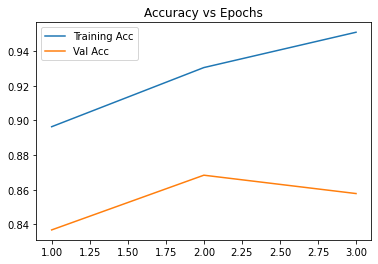

In [32]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1, len(acc)+1 )

plt.title('Accuracy vs Epochs')
plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.legend()
plt.show()

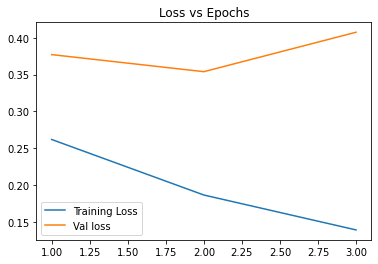

In [33]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss)+1 )

plt.title('Loss vs Epochs')
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.legend()
plt.show()

## Conclusion
- For accuracy graph, an increase in training result in decrease in validation accuracy. Indicating that the model is overfitting

### Evaluate Model

In [34]:
model.evaluate(X_test, Yt)

782/782 [==============================] - 24s 31ms/step - loss: 0.4119 - acc: 0.8564


[0.4118748903274536, 0.856440007686615]